In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Using the Mental Health dataset and what you have learn this week, answer the following questions :

What is the distribution of mental health conditions among different age groups in the tech industry?
How does the frequency of mental health issues vary by gender?
Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.

Hint
Introduction to the Dataset:

Download the dataset from Kaggle.
Load the dataset using Pandas.
Perform initial exploration to understand the dataset structure : whats the distribution of the data? What types of data do i have?
Data Cleaning:

Identify and handle missing values.
Detect and correct any inconsistencies in the data.
Drop irrelevant columns if necessary.

# Answer

boomer percentage: 0.5878378378378378,gen z percentage: 0.44871794871794873, millenial percentage: 0.5010548523206751

By age

After getting rid of unusual values (like negative numbers or very high numbers), and then grouping by generation, I found that approximately 59% of boomers, 50% of millenials, and 45% of gen Zers have sought mental health treatment in the past. I expected the younger generations to actually have had higher rates of mental health issues. Generally this generation is much more open and are aware of health issues prior generations would not have sought treatment for, such as anxiety. On the other had, they are younger and have had fewer opportunities to have gone to therapy and in this respect this finding makes sense.

Looking at the percentage of each generational group has had their mental health affect their work produces similar results.
43% of Boomers, 39% of Millenals, and 34% of Gen Z'ers

By gender

About 46% of males have sought treatment for mental health issues, 58% of females, and 82% of people I classify as non-binary/other gender identities. This is in line with stereotypes of the two genders. Women are more likely to be emotionally self-aware and therefore likelier to seek mental health help. Non-conventional gender comforming people may also have additional issues related to their gender identity that increase mental health issues, but the sample there is relatively small. After standardizing the gender responses to three options, Male, Female, or Nonbinary/other, the last category was only 22 respondants of 1259 total and may not be representative. However, it comforms with expectations.

What's intriguing is that 40% of males report often or sometimes their mental health issues affecting their work productivity, while only 38% of females do and 24% of nonbinary people do. I think this suggests that while men are slower to recognize mental health issues, once they do, their cases are more severe. I think this aligns with the fact that men typically are still overrepresnted in managerial positions and therefore have more stressful jobs. This hypothesis is worthy of further investigation.

By country

I removed all coutnries with a sample size of below 13. Of those remaining, I mapped the percentage of respondents who have sought mental health help. Topping the charts is Australia at 62%, in contrast to stereotypes of them as a relaxed fun-loving people. Any conclusions can be temperred by the fact that the sample size was only 21 total respondents. However, the US and UK have large sample sizes and are second and third of countries most likely to have sought mental health help, respectively, both over 50%. This indicates to me that there may be some theme in the anglo world, where mental health knowledge is more common. I also know that apps in the English language exist, such as Better Health, and other countries may not have as many online resources due to language barriers. Even though many of the other countries have high levels of English proficiency, therapy requires a higher than normal level for understanding the nuances. On the bottom of the list is France, at 15%. However the sample size is only 13 and was at the borderline of sample sizes too small I was considering dropping.

In [31]:
health_data = pd.read_csv('survey_dataset.csv')
health_df = pd.DataFrame(health_data)
health_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [27]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [28]:
health_df['self_employed'].unique()




array([nan, 'Yes', 'No'], dtype=object)

Normalizing gender capitalization

In [21]:
health_df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [35]:
health_df['Gender'] = health_df['Gender'].str.replace(r'\bf\b', 'Female', case=False)
health_df['Gender'] = health_df['Gender'].str.replace(r'\bm\b', 'Female', case=False)

health_df['Gender'] = health_df['Gender'].str.capitalize()
health_df['Gender']


0       Female
1       Female
2         Male
3         Male
4         Male
         ...  
1254      Male
1255      Male
1256      Male
1257    Female
1258      Male
Name: Gender, Length: 1259, dtype: object

In [44]:
health_df['Gender'] = health_df['Gender'].str.replace(r'\bMal\b', 'Male', case=False)
health_df['Gender'] = health_df['Gender'].str.replace(r'\bMaile\b', 'Male', case=False)
health_df['Gender'] = health_df['Gender'].str.replace(r'\bMail\b','Mail',case=False)
health_df['Gender'] = health_df['Gender'].str.replace(r'\bMake\b', 'Male', case=False)
health_df['Gender'] = health_df['Gender'].str.replace(r'\bFemake\b', 'Female', case=False)
health_df['Gender'] = health_df['Gender'].str.replace(r'\bFemail\b', 'Female', case=False)
health_df['Gender'] = health_df['Gender'].str.replace(r'\bMsle\b', 'Male', case=False)
health_df['Gender'] = health_df['Gender'].str.replace(r'\bMalr\b', 'Male', case=False)



<ipython-input-44-9d92244e0a31>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  health_df['Gender'] = health_df['Gender'].str.replace(r'\bMal\b', 'Male', case=False)
<ipython-input-44-9d92244e0a31>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  health_df['Gender'] = health_df['Gender'].str.replace(r'\bMaile\b', 'Male', case=False)
<ipython-input-44-9d92244e0a31>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  health_df['Gender'] = health_df['Gender'].str.replace(r'\bMail\b','Mail',case=False)
<ipython-input-44-9d92244e0a31>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  health_df['Gender'] = health_df['Gender'].str.replace(r'\bMake\b', 'Male', case=False)
<ipython-input-44-9d92244e0a31>:5: FutureWarning: The default value of regex will change from True to False in a future version.
 

In [58]:
health_df['Gender'] = health_df['Gender'].str.replace(r'\bMail\b','Male')
health_df['Gender'] = health_df['Gender'].str.replace(r'\bMan\b','Male')
health_df['Gender'] = health_df['Gender'].replace('Male (cis)','Male')
health_df['Gender'] = health_df['Gender'].replace('Female (cis)','Female')
health_df['Gender'] = health_df['Gender'].str.replace('Male (cis)','Male')
health_df['Gender'] = health_df['Gender'].str.replace(r'\bCis man\b','Male')
health_df['Gender'] = health_df['Gender'].str.replace(r'\bCis female\b','Male')


<ipython-input-58-9dbf138b0491>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  health_df['Gender'] = health_df['Gender'].str.replace(r'\bMail\b','Male')
<ipython-input-58-9dbf138b0491>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  health_df['Gender'] = health_df['Gender'].str.replace(r'\bMan\b','Male')
<ipython-input-58-9dbf138b0491>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  health_df['Gender'] = health_df['Gender'].str.replace('Male (cis)','Male')
<ipython-input-58-9dbf138b0491>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  health_df['Gender'] = health_df['Gender'].str.replace(r'\bCis man\b','Male')
<ipython-input-58-9dbf138b0491>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  health_df['Gender'] = health_df['Gender'].str.

In [70]:
health_df['Gender'] = health_df['Gender'].str.replace('Cis male','Male',case=False)
health_df['Gender'] = health_df['Gender'].str.replace('Cis-female/femme','Female',case=False)
health_df['Gender'] = health_df['Gender'].replace('Male ','Male')
health_df['Gender'] = health_df['Gender'].replace('Woman','Female')

In [72]:
health_df['Gender'] = health_df['Gender'].replace('Female ','Female')

In [108]:
new_g_hf = health_df
nonbinary = ~(new_g_hf['Gender']=='Female') & ~(new_g_hf['Gender']=='Male')
new_g_hf.loc[nonbinary,'Gender'] = 'Non-binary/Other'


In [113]:
new_g_hf

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Female,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [119]:
new_g_df['Gender'].value_counts()
new_g_df['Country'].value_counts()
new_g_df[['treatment','work_interfere']].value_counts()
#new_g_df['work_interfere'].value_counts() 

treatment  work_interfere
Yes        Sometimes         358
No         Never             183
Yes        Often             123
           Rarely            122
No         Sometimes         107
           Rarely             51
Yes        Never              30
No         Often              21
dtype: int64

In [147]:
gender = new_g_df['Gender']
treatment = new_g_df['treatment']

group_by_t = new_g_df.groupby(['Gender','treatment']).size().unstack()
group_by 

treatment,No,Yes
Gender,,
Female,166,230
Male,452,389
Non-binary/Other,4,18


In [170]:
#group_by_wi = new_g_df.groupby(['Gender','work_interfere']).size().unstack()
work_interfere_no_int = (new_g_df['work_interfere'] == 'Never') | (new_g_df['work_interfere'] == 'Rarely')
work_interfere_int = (new_g_df['work_interfere'] == 'Often') | (new_g_df['work_interfere'] == 'Sometimes')
new_g_df.loc[work_interfere_no_int,'work_int_group'] = 'Sometimes or Often'
new_g_df.loc[work_interfere_int,'work_int_group'] = 'Rarely or Never'

In [205]:
# Add work interfere_group col to be right after work_interferance column
cols = new_g_df.columns.tolist()
wi = cols.index('work_interfere') + 1
cols = cols[:wi] + ['work_int_group'] + cols[wi:]

cols


['Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'work_int_group',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

In [206]:
new_g_df = new_g_df[cols]


In [230]:
groupby_i = new_g_df.groupby(['Gender','work_interfere'])

In [231]:
groupby_i.size().unstack()

work_interfere,Never,Often,Rarely,Sometimes
Gender,,,,
Female,59,43,62,156
Male,153,96,107,298
Non-binary/Other,1,5,4,11


In [240]:
male_per_often = 96/(394+260)
female_per_often = 43/(199+121)
nb_per_often = 5/(5+16)

print(f'male percentage: {male_per_often},female percentage: {female_per_often}, nb percentage: {nb_per_often}')

male percentage: 0.14678899082568808,female percentage: 0.134375, nb percentage: 0.23809523809523808


In [241]:
male_per_some = 298/(394+260)
female_per_some = 156/(199+121)
nb_per_some = 11/(5+16)

print(f'male percentage: {male_per_some},female percentage: {female_per_some}, nb percentage: {nb_per_some}')

male percentage: 0.45565749235474007,female percentage: 0.4875, nb percentage: 0.5238095238095238


In [233]:
groupby_int = new_g_df.groupby(['Gender','work_int_group'])


In [218]:
groupby_int.size().unstack()


work_int_group,Rarely or Never,Sometimes or Often
Gender,,
Female,199,121
Male,394,260
Non-binary/Other,16,5


In [223]:
male_per = 260/(394+260)
female_per = 121/(199+121)
nb_per = 5/(5+16)

In [226]:
print(f'male percentage: {male_per},female percentage: {female_per}, nb percentage: {nb_per}')

male percentage: 0.39755351681957185,female percentage: 0.378125, nb percentage: 0.23809523809523808


In [227]:
groupby_t = new_g_df.groupby(['Gender','treatment'])
groupby_t.size().unstack()

treatment,No,Yes
Gender,,
Female,166,230
Male,452,389
Non-binary/Other,4,18


In [244]:
male_per_tr = 389/(452+389)
female_per_tr = 230/(230+166)
nb_per_tr  = 18/(4+18)

In [245]:
print(f'male percentage: {male_per_tr},female percentage: {female_per_tr}, nb percentage: {nb_per_tr}')

male percentage: 0.4625445897740785,female percentage: 0.5808080808080808, nb percentage: 0.8181818181818182


In [250]:
new_g_df['Gender'].value_counts()

Male                841
Female              396
Non-binary/Other     22
Name: Gender, dtype: int64

In [251]:
new_g_df['Age'].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 22             21
 41             21
 42             20
 21             16
 46             12
 45             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 49              4
 56              4
 57              3
 55              3
 54              3
 60              2
 47              2
 72              1
-29              1
 62              1
 329             1
 65              1
-1726            1
-1               1
 61              1
 58              1
 53              1
 5               1
 11              1
 8               1
 99999999999

In [254]:
new_g_df.loc[new_g_df['Age'] > 80, 'Age'] = np.nan

In [256]:
new_g_df.loc[new_g_df['Age'] == -29, 'Age'] = 29

In [260]:
new_g_df.loc[new_g_df['Age'] < 0, 'Age'] = np.nan

In [282]:
sorted_df = new_g_df.sort_values(by='Age', ascending=False)

In [277]:
new_g_df.loc[new_g_df['Age'] < 18, 'Age'] = np.nan # the very young ages seem like mistakes

In [285]:
new_g_df['Age'].value_counts()

29.0    86
32.0    82
26.0    75
27.0    71
33.0    70
28.0    68
31.0    67
34.0    65
30.0    63
25.0    61
35.0    55
23.0    51
24.0    46
37.0    43
38.0    39
36.0    37
39.0    33
40.0    33
43.0    28
22.0    21
41.0    21
42.0    20
21.0    16
46.0    12
45.0    12
44.0    11
19.0     9
18.0     7
20.0     6
48.0     6
50.0     6
51.0     5
56.0     4
49.0     4
57.0     3
54.0     3
55.0     3
47.0     2
60.0     2
61.0     1
62.0     1
58.0     1
53.0     1
72.0     1
65.0     1
Name: Age, dtype: int64

In [287]:
millenial = (new_g_df['Age'] >= 25 ) & (new_g_df['Age'] <= 40)
gen_z =  (new_g_df['Age'] >= 18 ) & (new_g_df['Age'] <= 24)
boomer =  (new_g_df['Age'] >= 41)
new_g_df.loc[millenial,'generation'] = 'Millenial'
new_g_df.loc[gen_z,'generation'] = 'Gen Z'
new_g_df.loc[boomer,'generation'] = 'Boomer'

In [291]:
groupgenby_t= new_g_df.groupby(['generation', 'treatment'])

groupgenby_t.size().unstack()

treatment,No,Yes
generation,,
Boomer,61,87
Gen Z,86,70
Millenial,473,475


In [297]:
boomer_int_per = 87/(87+61)
z_int_per = 70/(70+86)
mill_per = 475/(475+473)

print(f'boomer percentage: {boomer_int_per},gen z percentage: {z_int_per}, millenial percentage: {mill_per}')

boomer percentage: 0.5878378378378378,gen z percentage: 0.44871794871794873, millenial percentage: 0.5010548523206751


In [293]:
groupgenby_int= new_g_df.groupby(['generation', 'work_int_group'])

groupgenby_int.size().unstack()

work_int_group,Rarely or Never,Sometimes or Often
generation,,
Boomer,70,54
Gen Z,78,40
Millenial,456,291


In [298]:
boomer_int_per = 54/(54+70)
z_int_per = 40/(78+40)
mill_per = 291/(291+456)

print(f'boomer percentage: {boomer_int_per},gen z percentage: {z_int_per}, millenial percentage: {mill_per}')

boomer percentage: 0.43548387096774194,gen z percentage: 0.3389830508474576, millenial percentage: 0.3895582329317269


In [323]:
groupcountryby_t = new_g_df.groupby(['Country', 'treatment']).size().unstack()
groupcountryby_t

treatment,No,Yes
Country,,
Australia,8.0,13.0
Austria,3.0,NaN
"Bahamas, The",NaN,1.0
Belgium,5.0,1.0
Bosnia and Herzegovina,1.0,NaN
Brazil,4.0,2.0
Bulgaria,2.0,2.0
Canada,35.0,37.0
China,1.0,NaN


In [308]:
country_bool = new_g_df['Country']=='Bosnia and Herzegovina'

new_g_df[country_bool] #I'm checking to see what it means when NaN is in the table above. It means there are no participants from that country that chose that option.

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,work_int_group,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,generation
523,2014-08-27 17:19:05,25.0,Male,Bosnia and Herzegovina,NaN,No,Yes,No,Rarely,Sometimes or Often,...,Maybe,Yes,No,No,No,No,Don't know,Yes,NaN,Millenial


In [327]:
 groupcountryby_t['Total'] = groupcountryby_t.sum(axis=1)  

In [340]:
groupcountryby_t['Yes'].fillna('0',inplace=True)
groupcountryby_t['No'].fillna('0',inplace=True)

In [342]:
groupcountryby_t['Yes'] =  groupcountryby_t['Yes'].astype(int)
groupcountryby_t['No'] =  groupcountryby_t['No'].astype(int)

In [345]:
groupcountryby_t['Percentage'] =  groupcountryby_t['Yes']/ groupcountryby_t['Total']
    
groupcountry_total_perc =  groupcountryby_t[['Total','Percentage']]

In [349]:
groupcountry_total_perc.sort_values(by='Total', ascending=False)

treatment,Total,Percentage
Country,,
United States,751.0,0.545939
United Kingdom,185.0,0.502703
Canada,72.0,0.513889
Germany,45.0,0.466667
Netherlands,27.0,0.333333
Ireland,27.0,0.481481
Australia,21.0,0.619048
France,13.0,0.153846
India,10.0,0.300000


In [354]:
small_sample_size = groupcountry_total_perc['Total'] < 13

In [361]:
groupcountry_total_perc.drop(groupcountry_total_perc[small_sample_size].index, inplace=True) #dropping small sample sizes


C:\Users\97258\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [362]:
groupcountry_total_perc

treatment,Total,Percentage
Country,,
Australia,21.0,0.619048
Canada,72.0,0.513889
France,13.0,0.153846
Germany,45.0,0.466667
Ireland,27.0,0.481481
Netherlands,27.0,0.333333
United Kingdom,185.0,0.502703
United States,751.0,0.545939


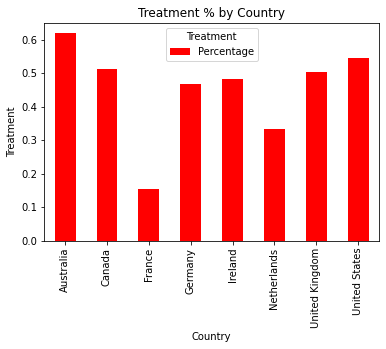

In [380]:
groupcountry_total_perc['Percentage'].plot(kind='bar', color='red')
plt.xlabel('Country')
plt.ylabel('Treatment')
plt.title('Treatment % by Country')
plt.legend(title='Treatment')
plt.show()

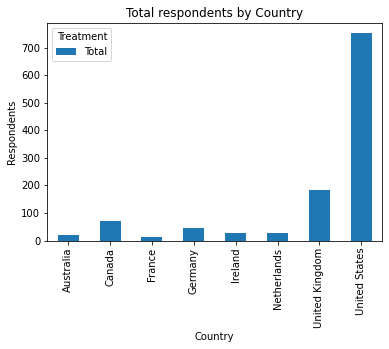

In [379]:
groupcountry_total_perc['Total'].plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Respondents')
plt.title('Total respondents by Country')
plt.legend(title='Treatment')
plt.show()